# Homework 8 Solutions

In [1]:
%cd '/home/cody/Physics 331/331 Homework (Cody)/HW 8 Lorenz Equations'
%ls
import matplotlib.pyplot as plt
import numpy as np

/home/cody/Physics 331/331 Homework (Cody)/HW 8 Lorenz Equations
 00246163.pdf                       'Lorenz c.png'
 1.4917383.pdf                       Lorenz_c.py
'Homework 8 Solutions.ipynb'         Lorenz_Data.csv
'HW 8 Lorenz Equations.aux'          Lorenz_master.py
'HW 8 Lorenz Equations.log'          Lorenz.py
'HW 8 Lorenz Equations.pdf'          Lorenz_r.py
'HW 8 Lorenz Equations.synctex.gz'  'Lorenz Solutions.png'
'HW 8 Lorenz Equations.tex'          Reciever.png
 Lorenz


In [2]:
# %load rk2.py
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values.
    """

    t = np.arange(t0, tf+dt, dt)

    y = np.zeros((len(t), len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(len(t)-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y


In [3]:
# %load Lorenz_c.py
import numpy as np
def Lorenz_c(x, t):
    """
    Lorenz system of coupled differential eqautions

    Inputs
    ----------
    w:  Array of dependent variables
        x = [u, v, w]
    t:  Independent variable, not an array as they all have the same independent
        variable

    Outputs
    ----------
    dx: Array of the derivative functions
        du/dt = sigma * (v - u)
        dv/dt = r*u - v - 20*u*w
        dw/dt = 5*u*v -b*w
        dw = [du/dt, dv/dt, dw/dt]
    """
    #First define some constants used
    sigma = 16
    r = 45.6
    b = 4
    du = sigma * (x[1] - x[0])
    dv = r*x[0] - x[1] - 20*x[0]*x[2]
    dw = 5*x[0]*x[1] - b*x[2]
    dx = np.array([du, dv, dw])
    return dx


In [4]:
t, y = rk2([0, 1, 0], 0, 100, 0.001, Lorenz_c)
u = y[:,0]

Text(0, 0.5, 'u')

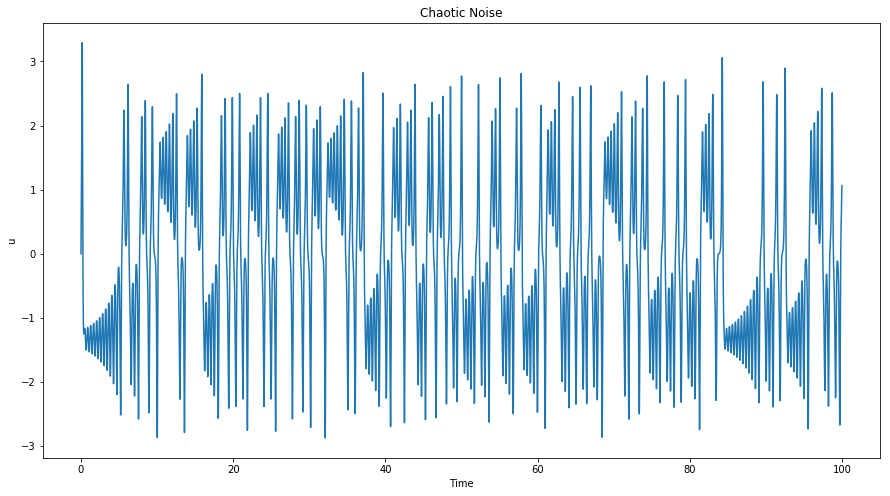

In [5]:
plt.figure(figsize = (15,8))
plt.plot(t, u)
plt.title('Chaotic Noise')
plt.xlabel('Time')
plt.ylabel('u')

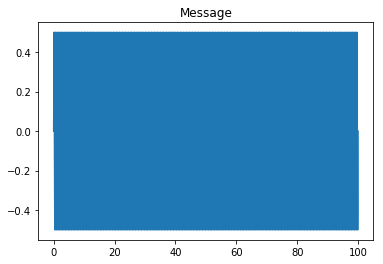

In [23]:
m = np.sin(t*2*np.pi*2)/2 # Message I want to send
plt.title('Message')
plt.plot(t, m)

Text(0, 0.5, 's(t) = m(t) + u(t)')

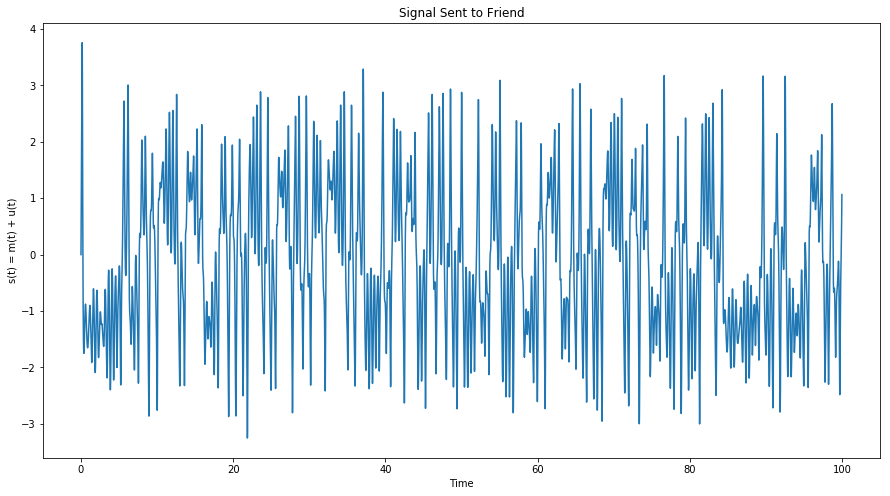

In [24]:
plt.figure(figsize = (15, 8))
plt.title('Signal Sent to Friend')
plt.plot(t, m+u)
plt.xlabel('Time')
plt.ylabel('s(t) = m(t) + u(t)')

In [25]:
import pandas as pd
data = {'t': t, 's': m+u}
df = pd.DataFrame(data)
df.to_csv("/home/cody/Physics 331/Lecture Notebooks/Lorenz_Data_quiet.csv")

In [52]:
# %load Lorenz_master.py
import numpy as np
def Lorenz_master(x, t):
    """
    Receiver Lorenz system that your friend has set up

    Inputs
    ----------
    x:  Array of dependent variables
        x = [u, v, w, u_r, v_r, w_r]
    t:  Independent variable, not an array as they all have the same independent
        variable

    Outputs
    ----------
    dx: Array of the derivative functions
        du/dt = sigma * (v - u)
        dv/dt = r*u - v - 20*u*w
        dw/dt = 5*u*v -b*w

        s = m + u

        dur/dt = sigma * (v_r - u_r)
        dvr/dt = r*s - v - 20*s*w_r
        dwr/dt = 5*s*v_r -b*w_r
        dxr = [du/dt, dv/dt, dw/dt, dur/dt, dvr/dt, dwr/dt]
    """
    #First define some constants used
    sigma = 16
    r = 45.6
    b = 4
    
    u, v, w, u_r, v_r, w_r = x
    
    #Lorenz noise I use to mask my signal
    du = sigma * (v - u)
    dv = r*u - v - 20*u*w
    dw = 5*u*v - b*w

    s = u + np.sin(t/10) #Signal I send out
    
    #Reciever signals
    dur = sigma * (v_r - u_r)
    dvr = r*s - v_r - 20*s*w_r
    dwr = 5*s*v_r - b*w_r
    
    dx = np.array([du, dv, dw, dur, dvr, dwr])
    return dx

In [53]:
t, ans = rk2([0, 1, 0, 0, 1, 0], 0, 100, 0.001, Lorenz_master)

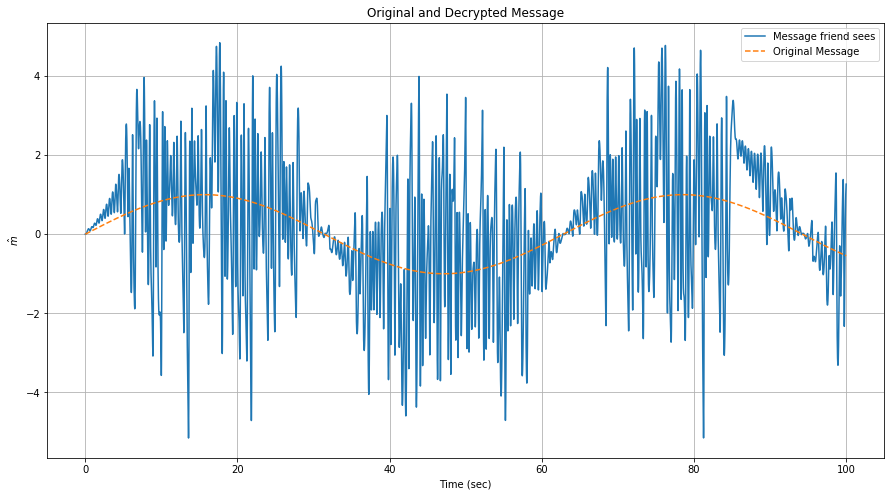

In [54]:
u = ans[:,0]
m = np.sin(t/10)               #Message I want to send
s = u + m              # Signal sent out

u_r = ans[:,3]  #Chaotic Noise my friend makes
m2 = s - u_r    # Signal minus there noise to hopefully get back m

plt.figure(figsize = (15, 8))
plt.plot(t,m2, label = 'Message friend sees')
plt.plot(t, m, '--', label = 'Original Message')
plt.title('Original and Decrypted Message')
plt.xlabel('Time (sec)')
plt.ylabel('$\hat{m}$')
plt.legend()
plt.grid()

The message our friend recieves is really noisy. But you can still see that it's a sine wave, and you can easally pick out the frequency. of the message and that's where a good chunck of the information is. 

In [20]:
# %load Lorenz_master.py
import numpy as np
def Lorenz_master2(x, t):
    """
    Receiver Lorenz system that your friend has set up

    Inputs
    ----------
    x:  Array of dependent variables
        x = [u, v, w, u_r, v_r, w_r]
    t:  Independent variable, not an array as they all have the same independent
        variable

    Outputs
    ----------
    dx: Array of the derivative functions
        du/dt = sigma * (v - u)
        dv/dt = r*u - v - 20*u*w
        dw/dt = 5*u*v -b*w

        s = m + u

        dur/dt = sigma * (v_r - u_r)
        dvr/dt = r*s - v - 20*s*w_r
        dwr/dt = 5*s*v_r -b*w_r
        dxr = [du/dt, dv/dt, dw/dt, dur/dt, dvr/dt, dwr/dt]
    """
    #First define some constants used
    sigma = 16
    r = 45.6
    b = 4
    b2 = 3
    u, v, w, u_r, v_r, w_r = x
    
    #Lorenz noise I use to mask my signal
    du = sigma * (v - u)
    dv = r*u - v - 20*u*w
    dw = 5*u*v - b*w

    s = u + np.sin(t/10)/100                #Signal I send out
    #Reciever signals. 
    dur = sigma * (v_r - u_r)
    dvr = r*s - v_r - 20*s*w_r
    dwr = 5*s*v_r - b2*w_r
    
    dx = np.array([du, dv, dw, dur, dvr, dwr])
    return dx

### Notice!
Only the 'b' value for the reciever changed. The noise we used to hide our message shouldn't change, but it's the person trying to listen in that has the wrong circuit set up that has the b = 3 value.

In [23]:
t, ans_bad = rk2([0, 1, 0, 0, 1, 0], 0, 100, 0.001, Lorenz_master2)

Text(0,0.5,'$\\hat{m}^\\prime$')

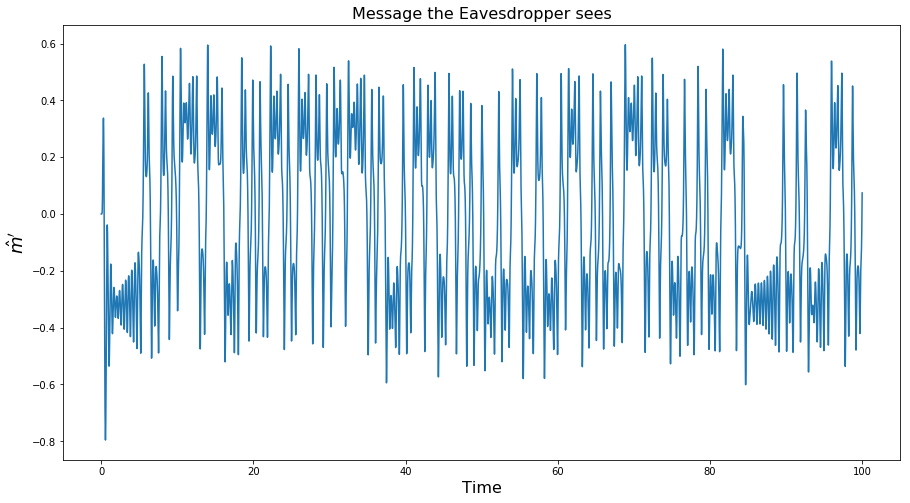

In [28]:
u_rb = ans_bad[:,3]

u = ans_bad[:,0]
m = np.sin(t/10)/100                #Message I want to send
s = u + m
m2b = s - u_rb

plt.figure(figsize = (15, 8))
plt.plot(t,m2b)
plt.title('Message the Eavesdropper sees', size = 16)
plt.xlabel('Time', size = 16)
plt.ylabel('$\hat{m}^\prime$', size = 18)


While our friend doesn't see the most clear message, anyone else trying to over hear our conversation will see absolute garbage. 